# Import packages

In [1]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xarray as xr

# Make plots nice

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams["figure.figsize"] = [15, 9]

# Open the data files and extract data

In [3]:
# path to the data file
base_data_path = Path("/data/c2/TMdata/git_geomar_de_data/")
data_file = base_data_path / "HadISST/v1.x.x/data/HadISST_sst.nc"

# open data set and extract SST for the year 2001
sst = xr.open_dataset(data_file).sst.sel(time=slice("2001-01-01", "2002-01-01"))

# Function definitions

In [4]:
def standardize_time_series(data):
    """Return data with mean zero and std.-dev. one."""
    return (data - data.mean(dim="time")) / data.std(dim="time")

In [5]:
def spatial_average_between_latitudes_original(data, lat_min=-90.0, lat_max=90.0, new_name=None):
    """Return spatially averaged `data`.
    
    The data are not weighted.  Missing data are excluded.
    """
    data = data.sel(latitude=slice(lat_min, lat_max))
    data = data.mean(dim="latitude").mean(dim="longitude")
    data = data.rename(new_name)
    return data

In [6]:
def spatial_average_between_latitudes_corrected(data, lat_min=-90.0, lat_max=90.0, new_name=None):
    """Return spatially averaged `data`.
    
    The data are not weighted.  Missing data are excluded.
    """
    data = data.sel(latitude=slice(lat_min, lat_max))
    data = data.mean(dim=["latitude", "longitude"])
    data = data.rename(new_name)
    return data

# Average and standardize SST and plot

In [7]:
sst_index_north_original = standardize_time_series(spatial_average_between_latitudes_original(
    sst, lat_max=0.0, lat_min=90.0, new_name="original"))

In [8]:
sst_index_north_corrected = standardize_time_series(spatial_average_between_latitudes_corrected(
    sst, lat_max=0.0, lat_min=90.0, new_name="corrected"))

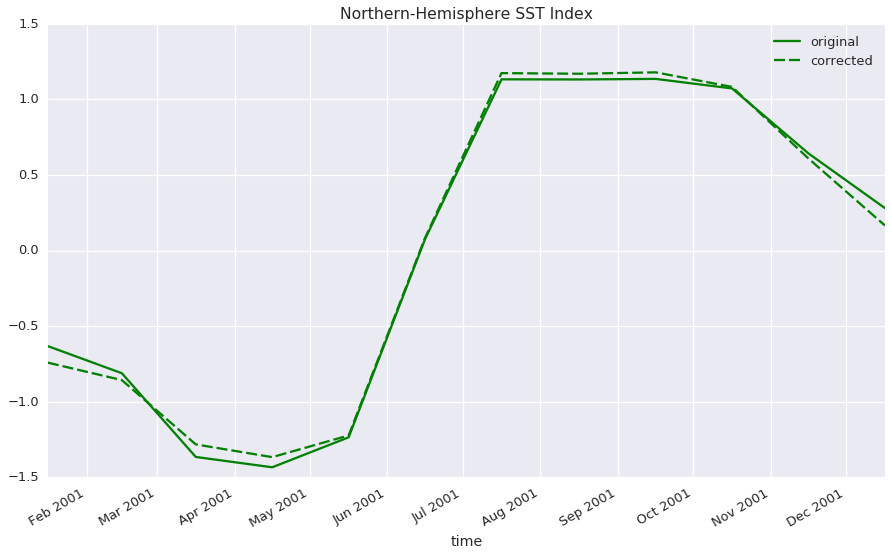

In [9]:
fig, ax = plt.subplots(1, 1)

sst_index_north_original.plot(ax=ax, color="green", linestyle="solid");
sst_index_north_corrected.plot(ax=ax, color="green", linestyle=(2, (11, 4)));

ax.set_ylabel("");
ax.set_title("Northern-Hemisphere SST Index");
ax.legend(loc=0);

plt.savefig("fig_02_sst_index_averaging_subtleties.png")

# Save the output data for later reference

In [10]:
output_dataset = xr.Dataset({'sst_index_north_original': sst_index_north_original,
                             'sst_index_north_corrected': sst_index_north_corrected})
output_dataset.to_netcdf("fig_02_sst_index_averaging_subtleties.nc")

# Exact version number of the data

In [11]:
!(cd /data/c2/TMdata/git_geomar_de_data/HadISST/v1.x.x/; \
  pwd -P; \
  /home/wrath/TM/software/miniconda3_latest/envs/git/bin/git describe;)

/data/c2/TMdata/git_geomar_de_data/HadISST/v1.x.x
v1.3.0


# Software that was used

In [12]:
!(conda list)

# packages in environment at /home/wrath/TM/software/miniconda3_20170727/envs/py3_std:
#
alabaster                 0.7.10                   py35_1    conda-forge
anaconda-client           1.6.5                      py_0    conda-forge
aospy                     0.1.2                    py35_0    conda-forge
asn1crypto                0.22.0                   py35_0    conda-forge
astroid                   1.5.3                    py35_0    conda-forge
babel                     2.4.0                    py35_0    conda-forge
basemap                   1.1.0                    py35_2    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
biggus                    0.15.0                   py35_0    conda-forge
bkcharts                  0.2                      py35_0    conda-forge
blas                      1.1                    openblas    conda-forge
bleach                    2.0.0                    py35_0    conda-forge
bokeh                     0.12.6   